In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("elevator_arrival.csv")
df.columns = ["floor","arrival_time","compound"] 
# 층, 도착시간, 같이 도착한 사람수
df.dtypes

floor            int64
arrival_time    object
compound         int64
dtype: object

In [3]:
# 도착 시간의 자료형 변환
df['arrival'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S', errors='raise')
df["arrivalsec"] = df["arrival"].dt.second
df["arrivalmin"] = df["arrival"].dt.minute
df["arrivalhour"] = df["arrival"].dt.hour
# 분을 기준으로 도착시간의 새로운 변수 생성
df["all"] = df["arrivalsec"]/60+df["arrivalmin"] +60*df["arrivalhour"]

In [4]:
df.head()

,floor,arrival_time,compound,arrival,arrivalsec,arrivalmin,arrivalhour,all
0,3,0:09:40,2,1900-01-01 00:09:40,40,9,0,9.666667
1,3,0:23:39,1,1900-01-01 00:23:39,39,23,0,23.650000
2,3,0:25:48,1,1900-01-01 00:25:48,48,25,0,25.800000
3,3,0:25:56,1,1900-01-01 00:25:56,56,25,0,25.933333
4,3,0:26:12,1,1900-01-01 00:26:12,12,26,0,26.200000


In [5]:
df.describe()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,9.170543,1.434109,28.348837,23.379845,0.418605,48.968605
std,10.674242,0.798876,18.091629,13.664618,0.495254,27.774765
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.283333
25%,1.000000,1.000000,12.000000,13.000000,0.000000,25.566667
50%,5.000000,1.000000,27.000000,22.000000,0.000000,43.366667
75%,11.000000,2.000000,45.000000,31.000000,1.000000,75.266667
max,33.000000,4.000000,59.000000,59.000000,1.000000,90.516667


In [6]:
# 통합된 데이터로 부터 각 층별 데이터 추출하기
grouped = df.groupby(df.floor) 
df_1 = grouped.get_group(1) # 11.16의 1층 데이터
df_3 = grouped.get_group(3) # 11.16의 3층 데이터
df_5 = grouped.get_group(5) # 11.16의 5층 데이터
df_11 = grouped.get_group(11) # 12.1의 1층 데이터
df_33 = grouped.get_group(33) # 12.1의 3층 데이터

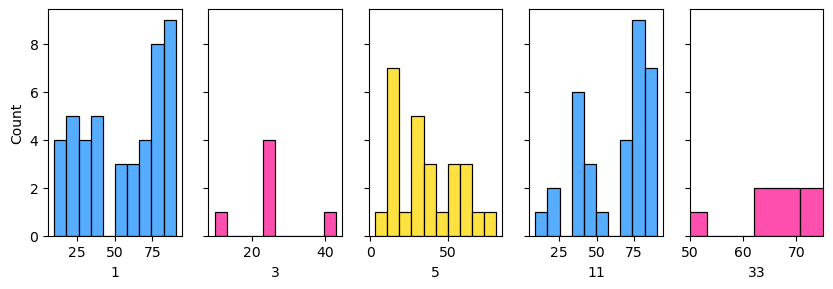

In [7]:
# plot
fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True, dpi=100)
ax = sns.histplot(data= df_1, x = "all" , color="dodgerblue", ax=axes[0],bins=10)
ax.set(xlabel="1")
ax =sns.histplot(data=df_3, x = "all" , color="deeppink", ax=axes[1],bins=10)
ax.set(xlabel="3")
ax =sns.histplot(data=df_5, x = "all", color="gold", ax=axes[2], bins=10)
ax.set(xlabel="5")
ax =sns.histplot(data=df_11, x = "all" , color="dodgerblue", ax=axes[3], bins=10)
ax.set(xlabel="11")
ax =sns.histplot(data=df_33, x = "all" , color="deeppink", ax=axes[4],bins=10)
ax.set(xlabel="33")
plt.xlim(50,75);

In [8]:
df_1.describe()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all
count,45.0,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.0,1.644444,28.288889,24.844444,0.511111,55.982593
std,0.0,1.003529,18.028541,13.404469,0.505525,26.428919
min,1.0,1.000000,0.000000,0.000000,0.000000,10.066667
25%,1.0,1.000000,12.000000,15.000000,0.000000,33.366667
50%,1.0,1.000000,27.000000,23.000000,1.000000,60.133333
75%,1.0,2.000000,46.000000,31.000000,1.000000,80.266667
max,1.0,4.000000,59.000000,59.000000,1.000000,90.516667


In [9]:
df_3.describe()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all
count,6.0,6.000000,6.000000,6.000000,6.0,6.000000
mean,3.0,1.333333,33.666667,25.166667,0.0,25.727778
std,0.0,0.516398,19.765289,10.815113,0.0,10.629397
min,3.0,1.000000,7.000000,9.000000,0.0,9.666667
25%,3.0,1.000000,18.750000,23.500000,0.0,24.187500
50%,3.0,1.000000,39.500000,25.000000,0.0,25.866667
75%,3.0,1.750000,46.000000,25.750000,0.0,26.133333
max,3.0,2.000000,56.000000,43.000000,0.0,43.116667


In [10]:
df_5.describe()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all
count,26.0,26.000000,26.000000,26.000000,26.000000,26.000000
mean,5.0,1.346154,26.076923,23.307692,0.192308,35.280769
std,0.0,0.689481,19.394686,16.396998,0.401918,21.071156
min,5.0,1.000000,0.000000,1.000000,0.000000,3.000000
25%,5.0,1.000000,10.000000,12.000000,0.000000,13.579167
50%,5.0,1.000000,22.500000,22.500000,0.000000,32.083333
75%,5.0,1.750000,40.000000,33.500000,0.000000,53.133333
max,5.0,4.000000,58.000000,56.000000,1.000000,80.966667


In [11]:
df_11.describe()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all
count,33.0,33.000000,33.000000,33.000000,33.000000,33.000000
mean,11.0,1.363636,29.181818,25.636364,0.606061,62.486364
std,0.0,0.699025,18.790713,11.836961,0.496198,23.612765
min,11.0,1.000000,0.000000,7.000000,0.000000,8.966667
25%,11.0,1.000000,12.000000,18.000000,0.000000,39.916667
50%,11.0,1.000000,29.000000,22.000000,1.000000,74.016667
75%,11.0,2.000000,46.000000,36.000000,1.000000,80.416667
max,11.0,4.000000,58.000000,50.000000,1.000000,90.300000


In [12]:
df_33.describe()

,floor,compound,arrivalsec,arrivalmin,arrivalhour,all
count,19.0,19.000000,19.000000,19.000000,19.000000,19.000000
mean,33.0,1.210526,28.473684,15.526316,0.315789,34.948246
std,0.0,0.535303,16.004751,12.357492,0.477567,31.983452
min,33.0,1.000000,2.000000,1.000000,0.000000,1.283333
25%,33.0,1.000000,18.500000,7.500000,0.000000,9.066667
50%,33.0,1.000000,30.000000,12.000000,0.000000,16.700000
75%,33.0,1.000000,37.000000,21.000000,1.000000,69.858333
max,33.0,3.000000,55.000000,45.000000,1.000000,88.050000


In [13]:
data = [sorted(df_1["all"]),sorted(df_3["all"]),sorted(df_5["all"]),sorted(df_11["all"]),sorted(df_33["all"])]
inter = [[0],[0],[0],[0],[0]]
for i in range(5):
    for j in range(len(data[i])-1):
        inter[i].append(data[i][j+1]-data[i][j] )
    inter[i].remove(0) # 처음에 강제적으로 넣은 0을 지워줌

<AxesSubplot:ylabel='Count'>

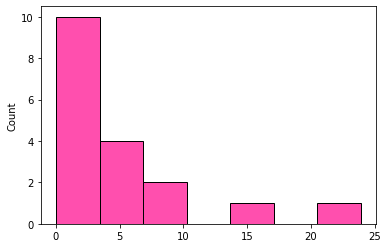

In [14]:
sns.histplot(data=inter[4], color="deeppink")

IndexError: index 5 is out of bounds for axis 0 with size 5

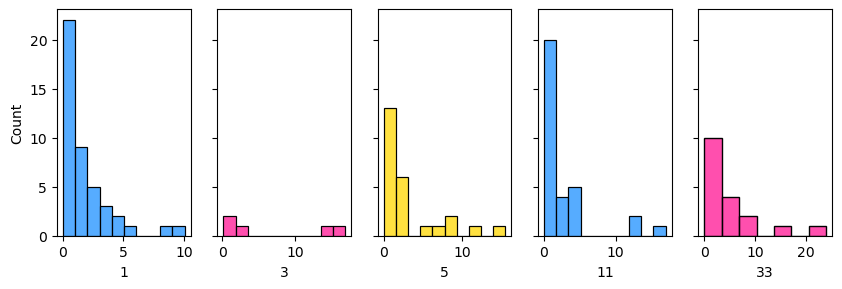

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True, dpi=100)
ax = sns.histplot(data= inter[0], color="dodgerblue", ax=axes[0],bins=10)
ax.set(xlabel="1")
ax =sns.histplot(data=inter[1], color="deeppink", ax=axes[1],bins=10)
ax.set(xlabel="3")
ax =sns.histplot(data=inter[2], color="gold", ax=axes[2], bins=10)
ax.set(xlabel="5")
ax =sns.histplot(data=inter[3],  color="dodgerblue", ax=axes[3], bins=10)
ax.set(xlabel="11")
ax =sns.histplot(data=inter[4], color="deeppink", ax=axes[4])
ax.set(xlabel="33")
ax =sns.histplot(data=inter[4], color="deeppink", ax=axes[5])
plt.xlim(50,75);

In [ ]:
print(f"TEST 1&3  : {kruskal(inter[0],inter[1])}")
print(f"TEST 1&5   : {kruskal(inter[0],inter[2])}")
print(f"TEST 1&11  : {kruskal(inter[0],inter[3])}")
print(f"TEST 1&33  : {kruskal(inter[0],inter[4])}")
print(f"TEST 3&5   : {kruskal(inter[1],inter[2])}")
print(f"TEST 3&11  : {kruskal(inter[1],inter[3])}")
print(f"TEST 3&33  : {kruskal(inter[1],inter[4])}")
print(f"TEST 5&11  : {kruskal(inter[2],inter[3])}")
print(f"TEST 5&33  : {kruskal(inter[2],inter[4])}")
print(f"TEST 11&33 : {kruskal(inter[3],inter[4])}")

In [ ]:
print(f"TEST 1&3 arrival : {kruskal(data[0],data[1])}")
print(f"TEST 1&5 arrival : {kruskal(data[0],data[2])}")
print(f"TEST 1&11 arrival : {kruskal(data[0],data[3])}")
print(f"TEST 1&33 arrival : {kruskal(data[0],data[4])}")
print(f"TEST 3&5 arrival : {kruskal(data[1],data[2])}")
print(f"TEST 3&11 arrival : {kruskal(data[1],data[3])}")
print(f"TEST 3&33 arrival : {kruskal(data[1],data[4])}")
print(f"TEST 5&11 arrival : {kruskal(data[2],data[3])}")
print(f"TEST 5&33 arrival : {kruskal(data[2],data[4])}")
print(f"TEST 11&33 arrival : {kruskal(data[3],data[4])}")

In [16]:
inter_333 = inter[1].copy()
inter_333.extend(inter[4])

print(f"TEST 1&333   : {kruskal(inter[0],inter_333)}")
print(f"TEST 1&5   : {kruskal(inter[0],inter[2])}")
print(f"TEST 1&11  : {kruskal(inter[0],inter[3])}")
print(f"TEST 333&5   : {kruskal(inter_333,inter[2])}")
print(f"TEST 333&11  : {kruskal(inter_333,inter[3])}")
print(f"TEST 5&11  : {kruskal(inter[2],inter[3])}")

TEST 1&333   : KruskalResult(statistic=3.491858997162768, pvalue=0.061671294565409665)
TEST 1&5   : KruskalResult(statistic=0.7636782166625313, pvalue=0.38217987978226964)
TEST 1&11  : KruskalResult(statistic=0.32894130963927226, pvalue=0.5662831492821345)
TEST 333&5   : KruskalResult(statistic=0.8817869912137078, pvalue=0.3477127036959603)
TEST 333&11  : KruskalResult(statistic=3.85336564496912, pvalue=0.04964627333225496)
TEST 5&11  : KruskalResult(statistic=1.1269900142653584, pvalue=0.28841828609435416)


In [17]:
data_333 = data[1].copy()
data_333.extend(data[4])

print(f"TEST 1&333 arrival : {kruskal(data[0],data_333)}")
print(f"TEST 1&5 arrival : {kruskal(data[0],data[2])}")
print(f"TEST 1&11 arrival : {kruskal(data[0],data[3])}")
print(f"TEST 333&5 arrival : {kruskal(data_333,data[2])}")
print(f"TEST 333&11 arrival : {kruskal(data_333,data[3])}")
print(f"TEST 5&11 arrival : {kruskal(data[2],data[3])}")

TEST 1&333 arrival : KruskalResult(statistic=10.039023474178407, pvalue=0.00153258427705946)
TEST 1&5 arrival : KruskalResult(statistic=9.445493132971096, pvalue=0.002116685805182548)
TEST 1&11 arrival : KruskalResult(statistic=1.0642251953767068, pvalue=0.30225349028295456)
TEST 333&5 arrival : KruskalResult(statistic=0.8524260355029583, pvalue=0.3558669288809979)
TEST 333&11 arrival : KruskalResult(statistic=13.789152542372875, pvalue=0.0002045136468522091)
TEST 5&11 arrival : KruskalResult(statistic=16.30822715280179, pvalue=5.382973466598365e-05)


In [18]:
inter_3335 = inter_333.copy()
inter_3335.extend(inter[2])

print(f"TEST 1&3335   : {kruskal(inter[0],inter_3335)}")
print(f"TEST 1&11   : {kruskal(inter[0],inter[3])}")
print(f"TEST 11&3335 : {kruskal(inter[3],inter_3335)}")

TEST 1&3335   : KruskalResult(statistic=2.7330561542761584, pvalue=0.09829103323066252)
TEST 1&11   : KruskalResult(statistic=0.32894130963927226, pvalue=0.5662831492821345)
TEST 11&3335 : KruskalResult(statistic=3.160633651042996, pvalue=0.07543389860136641)


In [19]:
data_3335 = data_333.copy()
data_3335.extend(data[2])

print(f"TEST 1&3335 arrival : {kruskal(data[0],data_3335)}")
print(f"TEST 1&11 arrival : {kruskal(data[0],data[3])}")
print(f"TEST 11&3335 arrival : {kruskal(data[3],data_3335)}")

TEST 1&3335 arrival : KruskalResult(statistic=14.352553379004602, pvalue=0.00015157399237302667)
TEST 1&11 arrival : KruskalResult(statistic=1.0642251953767068, pvalue=0.30225349028295456)
TEST 11&3335 arrival : KruskalResult(statistic=21.05513610513335, pvalue=4.46255051885191e-06)


In [20]:
inter_111 = inter[0].copy()
inter_111.extend(inter[3])
print(f"TEST 111&3335   : {kruskal(inter_111,inter_3335)}")

data_111 = data[0].copy()
data_111.extend(data[3])
print(f"TEST 1&3335 arrival : {kruskal(data_111,data_3335)}")

TEST 111&3335   : KruskalResult(statistic=4.05491580652954, pvalue=0.04404291513325165)
TEST 1&3335 arrival : KruskalResult(statistic=24.000410096607776, pvalue=9.631518402490757e-07)


In [32]:
df1 = pd.concat([df_1,df_11])
df35 = pd.concat([df_3,df_5,df_33])
df1.index = [i+1 for i in range(len(df1))]
df35.index = [i+1 for i in range(len(df35))]

allplus = [df1["all"][i+1] for i in range(len(df1))]
allplus.insert(0,0)
allplus.pop()
df1["allplus"] = allplus
df1["inter"] = df1["all"]-df1["allplus"]
df_ = df1.iloc[1:]
df__ = df_[["inter","compound"]]

In [24]:
df__.corr(method="kendall")

,inter,compound
inter,1.000000,0.112925
compound,0.112925,1.000000


In [25]:
df__.corr(method='spearman')

,inter,compound
inter,1.000000,0.150289
compound,0.150289,1.000000


In [26]:
df__.corr(method='pearson')

,inter,compound
inter,1.000000,0.107943
compound,0.107943,1.000000


In [28]:
allplus35 = [df35["all"][i+1] for i in range(len(df35))]
allplus35.insert(0,0)
allplus35.pop()
df35["allplus35"] = allplus35
df35["inter"] = df35["all"]-df35["allplus35"]
df_35 = df35.iloc[1:]
df__35 = df_35[["inter","compound"]]

In [29]:
df__35.corr(method='pearson')

,inter,compound
inter,1.000000,-0.059848
compound,-0.059848,1.000000


In [30]:
df__35.corr(method='spearman')

,inter,compound
inter,1.000000,-0.112895
compound,-0.112895,1.000000


In [31]:
df__35.corr(method="kendall")

,inter,compound
inter,1.000000,-0.091829
compound,-0.091829,1.000000
